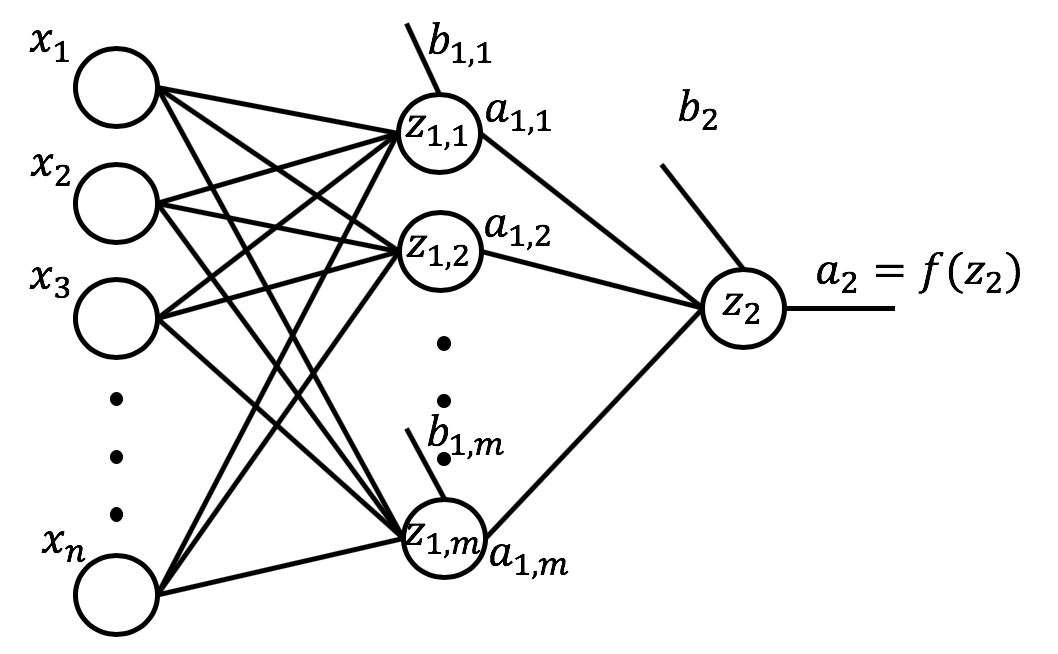

A general network with 𝑛 inputs will have multiple hidden layers, each with 𝑚 nodes, and an output layer. Though illustrated with one hidden layer, our coding will enable several layers. Similarly, the output layer will have more than one node, despite the depiction of a single node.









defining the structure of the network the structure of the network

In [11]:
n = 2 # number of inputs
num_hidden_layers = 2 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 1 # number of nodes in the output layer

inititailize the weights and the biases in the network to random numbers

In [12]:
import numpy as np
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):

    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}

    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(num_hidden_layers + 1):

        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer]

        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }

        num_nodes_previous = num_nodes

    return network # return the network

Compute Weighted Sum at Each Node

In [13]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

In [14]:
from random import seed
import numpy as np

np.random.seed(12)
inputs = np.around(np.random.uniform(size=2), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.15 0.74]


Compute Node Activation

In [15]:
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

Forward Propagation

Start with the input layer as the input to the first hidden layer.
Compute the weighted sum at the nodes of the current layer.
Compute the output of the nodes of the current layer.
Set the output of the current layer to be the input to the next layer.
Move to the next layer in the network.
Repeat steps 2 - 4 until we compute the output of the output layer.

In [17]:
def forward_propagate(network, inputs):

    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer

    for layer in network:

        layer_data = network[layer]

        layer_outputs = []
        for layer_node in layer_data:

            node_data = layer_data[layer_node]

            # compute the weighted sum and the output of each node at the same time
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))

        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))

        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

Base on step by step , This is another example.

intialize_network

In [18]:
my_network = initialize_network(5, 3, [2, 3, 2], 3)

Define its weights and biases


In [19]:
inputs = np.around(np.random.uniform(size=5), decimals=2)

Network prediction

In [20]:
predictions = forward_propagate(my_network, inputs)
print('The predicted values by the network for the given input are {}'.format(predictions))

The outputs of the nodes in hidden layer number 1 is [0.8729, 0.9172]
The outputs of the nodes in hidden layer number 2 is [0.7363, 0.7848, 0.6946]
The outputs of the nodes in hidden layer number 3 is [0.7802, 0.8848]
The predicted values by the network for the given input are [0.8219, 0.8903, 0.8116]
